<a href="https://colab.research.google.com/github/OrionXV/ISROProject/blob/Ishaan/ISROproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://drive.google.com/file/d/1GkwE0MAfiOrRlOqwLhZxuB7bKXgziEub/view?usp=sharing
#https://drive.google.com/file/d/1bRy8RDtWz5hbOn888XHSO3QToUAYCctS/view?usp=sharing
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1bRy8RDtWz5hbOn888XHSO3QToUAYCctS' -O lc.zip
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1bRy8RDtWz5hbOn888XHSO3QToUAYCctS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1bRy8RDtWz5hbOn888XHSO3QToUAYCctS" -O lc.zip && rm -rf /tmp/cookies.txt

--2022-03-14 06:04:11--  https://docs.google.com/uc?export=download&confirm=t&id=1bRy8RDtWz5hbOn888XHSO3QToUAYCctS
Resolving docs.google.com (docs.google.com)... 74.125.31.138, 74.125.31.139, 74.125.31.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.31.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kqo9dden2t350cs7iplglmlo6k1hmbsh/1647237825000/04989237414475792611/*/1bRy8RDtWz5hbOn888XHSO3QToUAYCctS?e=download [following]
--2022-03-14 06:04:12--  https://doc-14-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kqo9dden2t350cs7iplglmlo6k1hmbsh/1647237825000/04989237414475792611/*/1bRy8RDtWz5hbOn888XHSO3QToUAYCctS?e=download
Resolving doc-14-a0-docs.googleusercontent.com (doc-14-a0-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-14-a0-docs.googleusercontent.com (doc-14-a0-do

In [2]:
#!unzip -q lc.zip
!unzip -q lc.zip

In [3]:
!pip install astropy

In [4]:
import astropy

In [5]:
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import TimeSeries
from astropy import units
import numpy as np
%config InLineBackend.figure_format = 'retina'
import math
import astropy.convolution.convolve as conv
from astropy.convolution import Box1DKernel as box1d
from astropy.convolution import Gaussian1DKernel as g1d
from scipy.signal import find_peaks
from scipy.signal import peak_widths

In [6]:
def pdcreator(lc_path):
        lc_data = Table.read(lc_path)
        lc_data = lc_data.to_pandas()
        lc_data['TIME']=lc_data['TIME']-lc_data['TIME'][0]+1
        return lc_data

In [7]:
def binner(x,bin_size):
  Z=Table.from_pandas(x)
  Z=Z[['TIME','RATE','ERROR']]
  Z['TIME']=(np.trunc((x['TIME']-x['TIME'][0])/bin_size))*bin_size+x['TIME'][0]
  dat_grouped = Z.group_by(Z['TIME'])
  dat_binned = dat_grouped.groups.aggregate(np.median)
  dat_binned=dat_binned.to_pandas()
  
  return dat_binned

In [8]:
def plot_portion(dataframe,kind='line'):
  plt.figure(figsize=(20,8))   
  plt.plot(dataframe['TIME'],dataframe['RATE'])
  plt.show()
      

In [9]:
def plot_portion_2(dataframe,kind='line'):
  #plt.figure(figsize=(20,8))   
  dataframe.plot(x = 'TIME', y = 'RATE', sharey = True, sharex = True, figsize = (20, 8), subplots = True)
  #plt.show()

In [10]:
def convolve(data,width):
  data['RATE'] =conv(np.array(data['RATE']),kernel = g1d(width),boundary = 'extend')

In [11]:
def checker(data,mul,P):
  peaks = []
  for i in range(data.shape[0]-9*mul):
    if(data[i+3*mul]>data[i+2*mul] and data[i+2*mul]>data[i+1*mul] and data[i+1*mul]>data[i] and data[i+3*mul]>data[i]*P and data[i+3*mul] > data[i+6*mul]*P and data[i+3*mul]>data[i+4*mul] and data[i+4*mul]>data[i+5*mul] and data[i+5*mul]>data[i+6*mul]):
      peaks.append(i+3)
  return peaks

In [12]:
#lc1  = pdcreator('/content/lc/ch2_xsm_20200406_v1_level2.lc')
#c1 = pdcreator()
lc1 = pdcreator('/content/lc/ch2_xsm_20200406_v1_level2.lc')


In [ ]:
import regex as re 
import os
import glob

path = '/content/lc'
extension = 'lc'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))
print(result)

['ch2_xsm_20200316_v1_level2.lc', 'ch2_xsm_20190929_v1_level2.lc', 'ch2_xsm_20200317_v1_level2.lc', 'ch2_xsm_20200405_v1_level2.lc', 'ch2_xsm_20210331_v1_level2.lc', 'ch2_xsm_20200918_v1_level2.lc', 'ch2_xsm_20191004_v1_level2.lc', 'ch2_xsm_20200910_v1_level2.lc', 'ch2_xsm_20200406_v1_level2.lc', 'ch2_xsm_20190921_v1_level2.lc', 'ch2_xsm_20191001_v1_level2.lc', 'ch2_xsm_20190914_v1_level2.lc', 'ch2_xsm_20200307_v1_level2.lc', 'ch2_xsm_20200331_v1_level2.lc', 'ch2_xsm_20200404_v1_level2.lc', 'ch2_xsm_20190916_v1_level2.lc', 'ch2_xsm_20190926_v1_level2.lc', 'ch2_xsm_20210928_v1_level2.lc', 'ch2_xsm_20191003_v1_level2.lc', 'ch2_xsm_20190917_v1_level2.lc', 'ch2_xsm_20200410_v1_level2.lc', 'ch2_xsm_20190930_v1_level2.lc', 'ch2_xsm_20200924_v1_level2.lc', 'ch2_xsm_20200318_v1_level2.lc', 'ch2_xsm_20191005_v1_level2.lc', 'ch2_xsm_20191002_v1_level2.lc', 'ch2_xsm_20190918_v1_level2.lc', 'ch2_xsm_20200329_v1_level2.lc', 'ch2_xsm_20200409_v1_level2.lc', 'ch2_xsm_20200314_v1_level2.lc', 'ch2_xsm_

In [ ]:
LC_files = []
for x in result:
    LC_files.append(pdcreator('/content/lc/' + x)) 

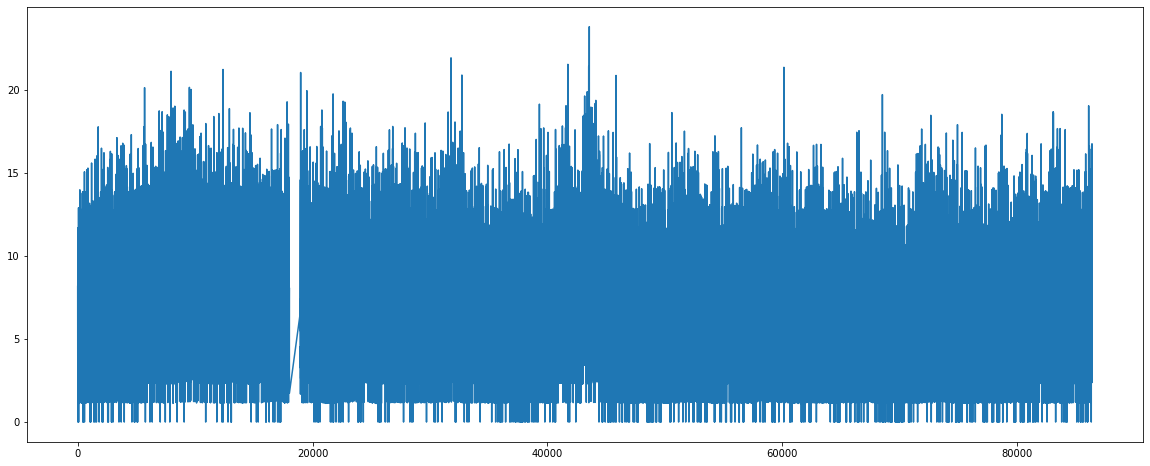

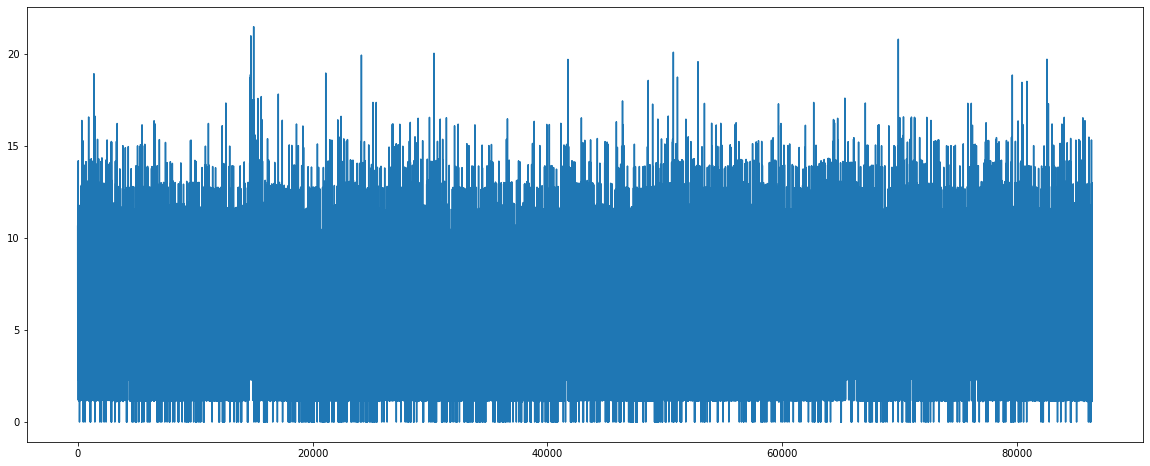

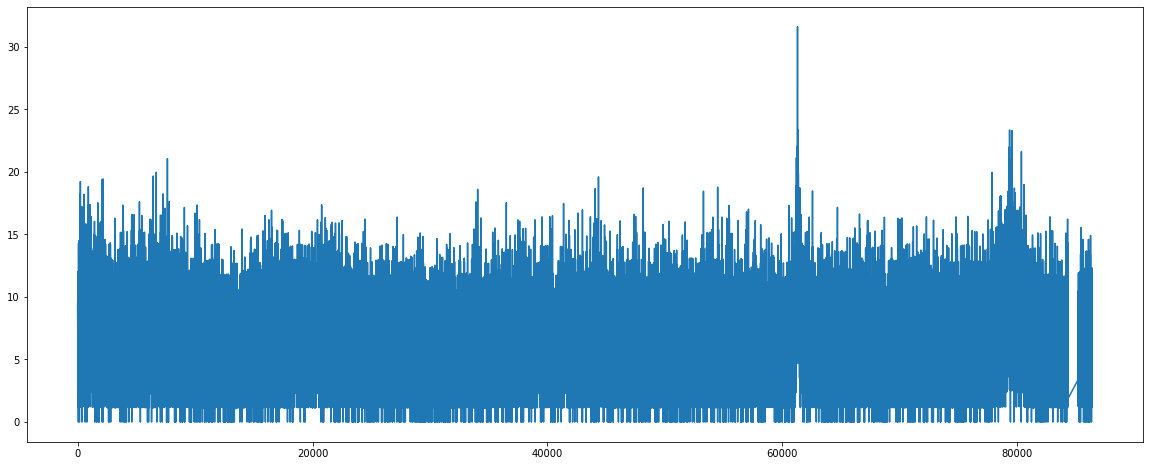

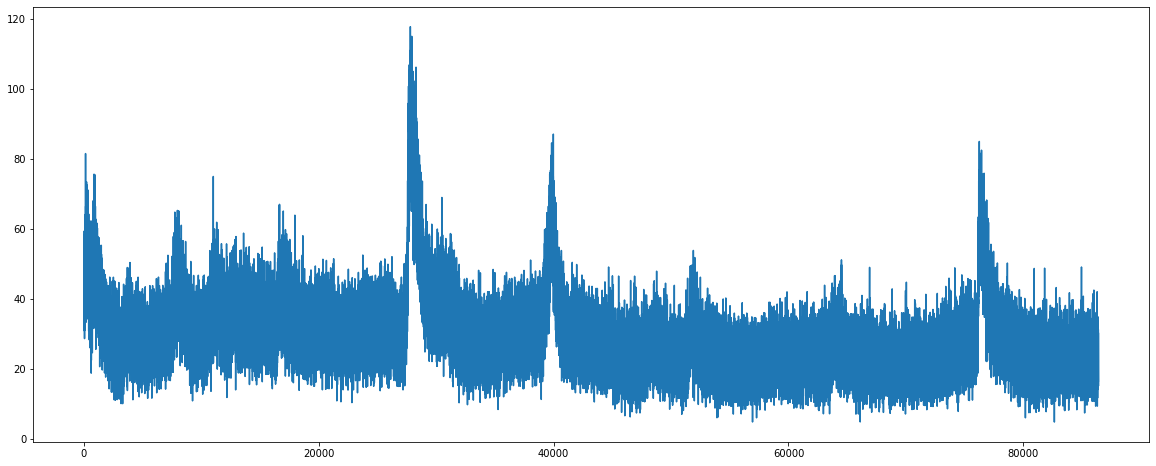

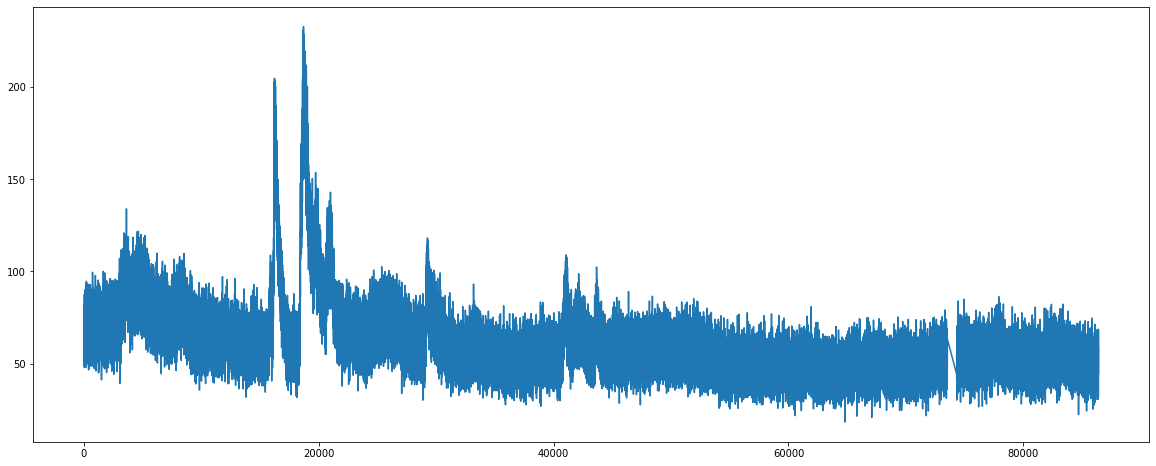

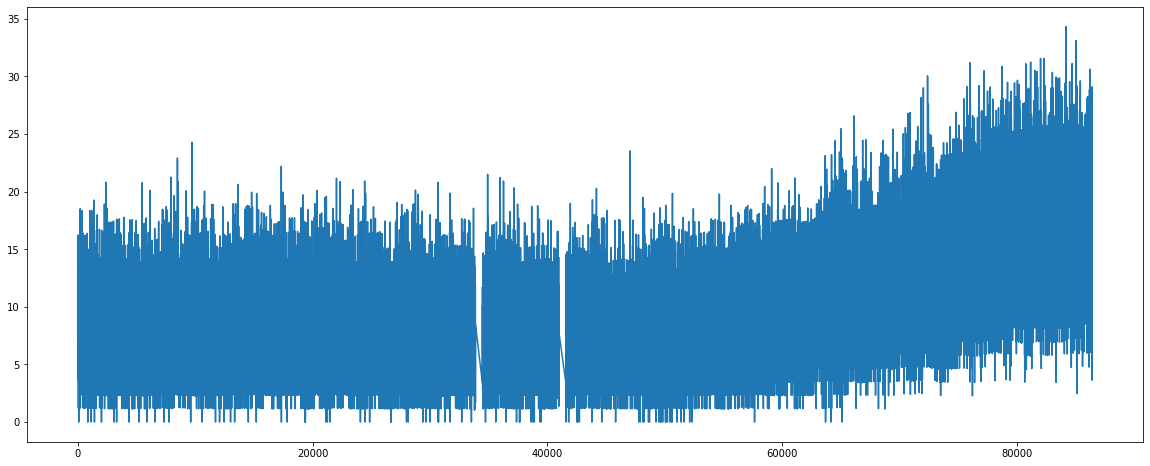

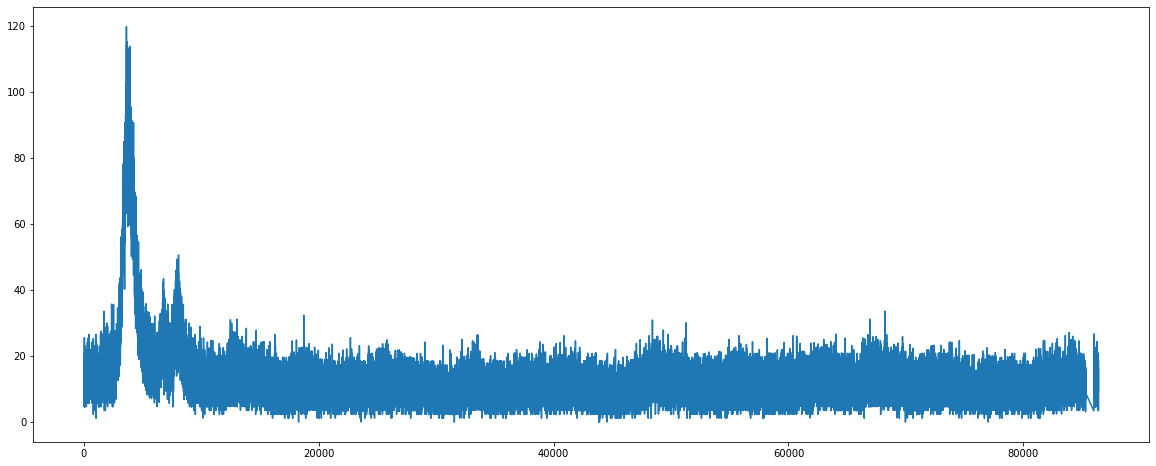

KeyboardInterrupt: ignored

In [ ]:
for x in LC_files:
    plot_portion(x)

In [ ]:
for x in LC_files:
    convolve(x, 70)

In [ ]:
plt.figure(figsize=(20,8))
for x in LC_files:
    if x['RATE'].max() >= 500:
        plt.plot(x['TIME'], x["RATE"])

plt.show()

In [ ]:
plt.figure(figsize=(20,8))
for x in LC_files:
    if x['RATE'].max() < 100:
        plt.plot(x['TIME'], x["RATE"])

plt.show()

In [ ]:
lc2=binner(lc1,20)

In [ ]:
lc1.describe()

,TIME,RATE,ERROR,FRACEXP
count,86378.000000,86378.000000,86378.000000,86378.000000
mean,43209.851722,37.482182,5.672819,1.000116
std,24937.186717,48.269802,2.302177,0.010758
min,1.000000,3.416019,1.848248,1.000000
25%,21615.250000,21.529115,4.639779,1.000000
50%,43209.500000,26.456626,5.143576,1.000000
75%,64805.750000,33.411263,5.780248,1.000000
max,86400.000000,555.023743,23.558943,2.000000


In [13]:
convolve(lc1,70)

In [ ]:
convolve(lc2,70)


In [ ]:
plot_portion(lc2)
plot_portion(lc1)

NameError: ignored

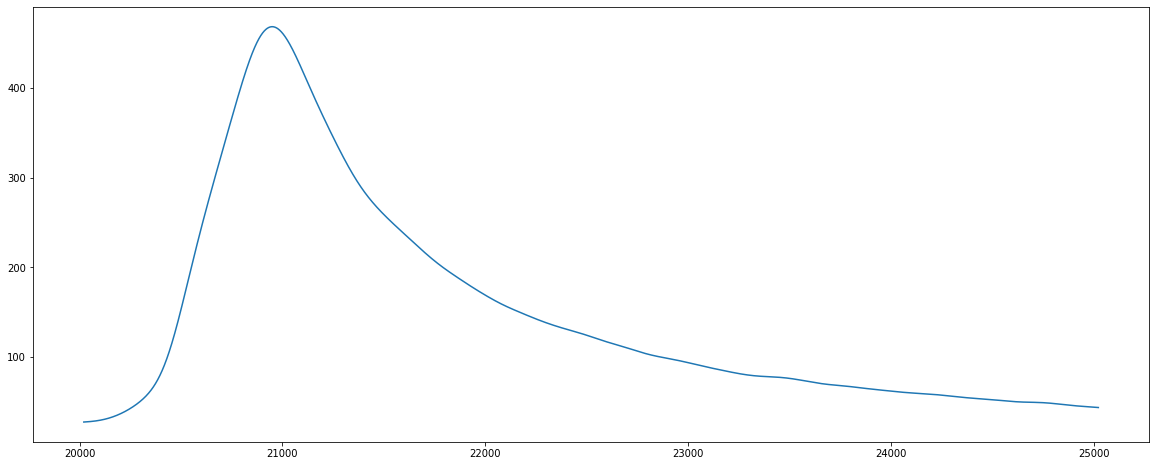

In [14]:
plot_portion(lc1[20000:25000])

In [ ]:
a=find_peaks(lc2['RATE'],prominence=100)
a[0]
lc2['TIME'][a[0]]

1072    21441.0
Name: TIME, dtype: float64

In [ ]:
width=peak_widths(lc2['RATE'],a[0],rel_height=0.1)

width


(array([76.48269032]),
 array([154.43032799]),
 array([1034.69429401]),
 array([1111.17698433]))

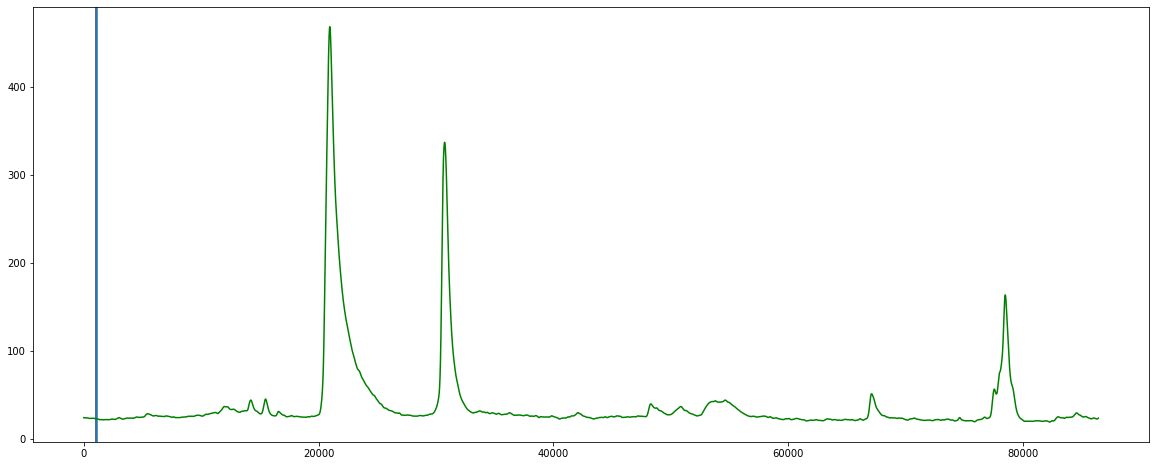

In [ ]:


plt.figure(figsize = (20,8))
for idx in a[0]:

   plt.axvline(x = lc1['TIME'][idx],color='r')
for i in np.trunc(width[2]):
   plt.axvline(x=lc1['TIME'][i])
for i in np.trunc(width[3]):
   plt.axvline(x=lc1['TIME'][i])
plt.plot(lc1['TIME'],lc1['RATE'],color='g')
   
 

In [ ]:
t = lc2["TIME"][:1000]#[int(width[2][1]):int(width[3][1])]
#t = t - lc1["TIME"][1500]
rate = lc2["RATE"][:1000]#[int(width[2][1]):int(width[3][1])]


In [27]:
import math 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.optimize import leastsq
from scipy.special import erf
%config InLineBackend.figure_format = 'retina'

class curve_fit():
  def __init__(self, data,peakstart,peakend):
    self.data=data
    self.params=[0.2, 0.3, 0.3, 0.4, 0.1, 0.1]
    
    self.peakstart=peakstart
    self.peakend=peakend
    
    

  def z_func(self,B, C, D):
    return (2*B + (C**2)*D)/(2*C)

  def objective_func(self,T, A, B, C, D, E, F):
    return math.sqrt(np.pi*0.5)*A*C*np.exp(D/2*((2*B)+(C**2)*(D/2)-(2*(T*E+ F))))*(erf(self.z_func(B, C, D))- erf(self.z_func(B, C, D) - (T*E+ F)/C))

  def objective_cost_func(self,params,x,y):
    a0, b0, c0, d0, e0, f0 = params[0], params[1],params[2], params[3],params[4], params[5]
    return np.sqrt(((y - self.objective_func(x, a0, b0, c0, d0, e0, f0))**2)/y)

  def min_max_scaler(self):
    self.data['RATESCALED'] = (self.data['RATE']- self.data['RATE'].min())/(self.data['RATE'].max()- self.data['RATE'].min())
    self.data['TIMESCALED'] = (self.data['TIME']- self.data['TIME'].min())/(self.data['TIME'].max()- self.data['TIME'].min())*2 

  def result(self):
    self.min_max_scaler()
    self.TIME=self.data['TIME'][self.peakstart:self.peakend]-self.data['TIME'][self.peakstart]
    self.RATE=self.data['RATESCALED'][self.peakstart:self.peakend]
    resultsq = leastsq(self.objective_cost_func, self.params, (self.TIME,self.RATE))
    a, b, c, d, e, f = resultsq[0][0], resultsq[0][1], resultsq[0][2], resultsq[0][3], resultsq[0][4], resultsq[0][5]
    return [a,b,c,d,e,f]

  def newcurve(self):
    a,b,c,d,e,f=self.result()
    #return pd.DataFrame({'TIME':self.TIME,'RATE':self.objective_func(self.TIME,a,b,c,d,e,f)})
    return self.TIME,self.objective_func(self.TIME, a, b, c, d, e, f)






In [29]:
d=curve_fit(lc1,20000,25000)

In [30]:
a=d.newcurve()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


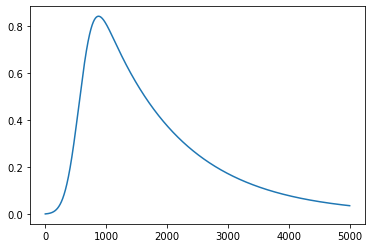

In [31]:
plt.plot(a[0],a[1])